In [1]:
import sys
sys.path.insert(0, '../src')


The portfolio metrics for the maximum return/std dev. portfolio:
returns            0.220839
std_dev            0.150564
returns/std_dev    1.466743
Name: 459, dtype: float64

The portfolio weights for each stock in the maximum return/std dev. portfolio is as:
CVX 34.09%
GOOGL 10.84%
MSFT 55.07%
The portfolio metrics for the minimum std dev. portfolio:
returns            0.193366
std_dev            0.140431
returns/std_dev    1.376947
Name: 549, dtype: float64

The portfolio weights for each stock in the minimum std dev. portfolio is as:
CVX 40.71%
GOOGL 43.34%
MSFT 15.96%


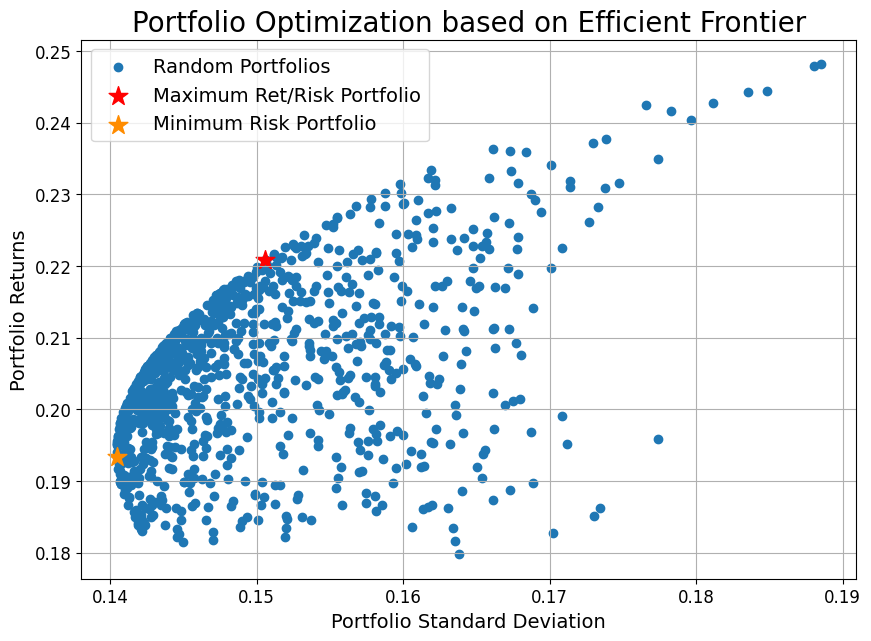


PORTFOLIO AVEC SHARPE RATIO MAXIMUM:
Rendement annuel: 22.0839%
Écart-type: 15.0564%
Sharpe Ratio: 1.4667

PORTFOLIO AVEC RISQUE MINIMUM:
Rendement annuel: 19.3366%
Écart-type: 14.0431%
Sharpe Ratio: 1.3769


In [4]:
from mpt_multi_asset.optimizer import read_csv
from mpt_multi_asset.optimizer import calculate_annual_returns, calculate_daily_returns
from mpt_multi_asset.optimizer import generate_random_portfolios
from mpt_multi_asset.optimizer import optimal_portfolios
from mpt_multi_asset.optimizer import efficient_frontier
from mpt_multi_asset.optimizer import read_csv 
from mpt_multi_asset.optimizer import print_portfolio_results
import os

# Charger et calculer
stock_prices = read_csv()
annual_returns = calculate_annual_returns(stock_prices)
stock_returns = calculate_daily_returns(stock_prices)

# Générer portfolios
portfolio, weights_array = generate_random_portfolios(
    stock_prices, annual_returns, stock_returns, num_of_portfolios=1000
)

# Trouver les portfolios optimaux
max_ret_by_std_dev, wts_max_ret_by_std_dev, min_std_dev, wts_min_std_dev = optimal_portfolios(
    portfolio, weights_array
)

# Afficher les résultats
print_portfolio_results(stock_prices, max_ret_by_std_dev, min_std_dev, 
                       wts_max_ret_by_std_dev, wts_min_std_dev)

# Afficher le graphique
# s'assurer que le dossier existe avant d'enregistrer le graphique
os.makedirs('notebooks', exist_ok=True)
efficient_frontier(portfolio, max_ret_by_std_dev, min_std_dev)

# Affichage détaillé supplémentaire
print("\n" + "="*60)
print("PORTFOLIO AVEC SHARPE RATIO MAXIMUM:")
print("="*60)
print(f"Rendement annuel: {max_ret_by_std_dev['returns']*100:.4f}%")
print(f"Écart-type: {max_ret_by_std_dev['std_dev']*100:.4f}%")
print(f"Sharpe Ratio: {max_ret_by_std_dev['returns/std_dev']:.4f}")

print("\n" + "="*60)
print("PORTFOLIO AVEC RISQUE MINIMUM:")
print("="*60)
print(f"Rendement annuel: {min_std_dev['returns']*100:.4f}%")
print(f"Écart-type: {min_std_dev['std_dev']*100:.4f}%")
print(f"Sharpe Ratio: {min_std_dev['returns/std_dev']:.4f}")